In [1]:
# !pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
powiat_url = "https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/powiaty/powiaty-max.geojson"
wojewodztwo_url = "https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-max.geojson"
df_powiat = gpd.read_file(powiat_url)
df_wojewodztwo = gpd.read_file(wojewodztwo_url)

## Informacje o głównych obszarach badawczych

### Dla województwa

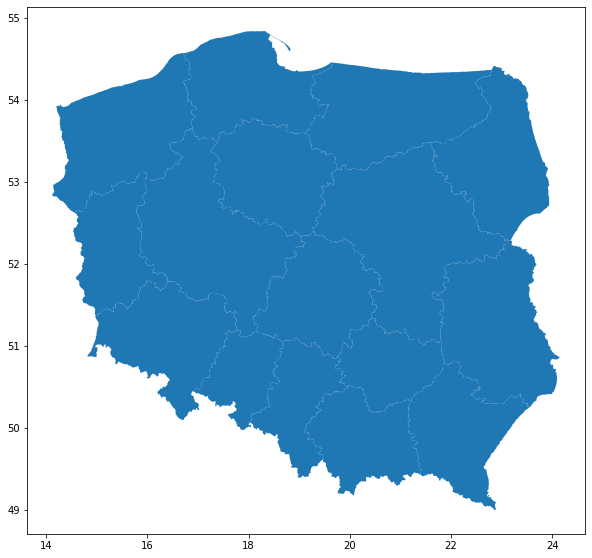

In [9]:
df_wojewodztwo.plot(figsize=(10,10))

In [5]:
df_wojewodztwo.head()

,id,nazwa,geometry
0,1,śląskie,"MULTIPOLYGON (((18.91690 51.09610, 18.91680 51..."
1,2,opolskie,"MULTIPOLYGON (((17.81200 51.18670, 17.81210 51..."
2,3,wielkopolskie,"MULTIPOLYGON (((16.71450 53.29910, 16.71450 53..."
3,4,zachodniopomorskie,"MULTIPOLYGON (((14.22610 53.92770, 14.22630 53..."
4,5,świętokrzyskie,"MULTIPOLYGON (((19.70430 50.75240, 19.70440 50..."


In [6]:
df_wojewodztwo.nazwa

0                 śląskie
1                opolskie
2           wielkopolskie
3      zachodniopomorskie
4          świętokrzyskie
5      kujawsko-pomorskie
6               podlaskie
7            dolnośląskie
8            podkarpackie
9             małopolskie
10              pomorskie
11    warmińsko-mazurskie
12                łódzkie
13            mazowieckie
14              lubelskie
15               lubuskie
Name: nazwa, dtype: object

### Dla powiatu

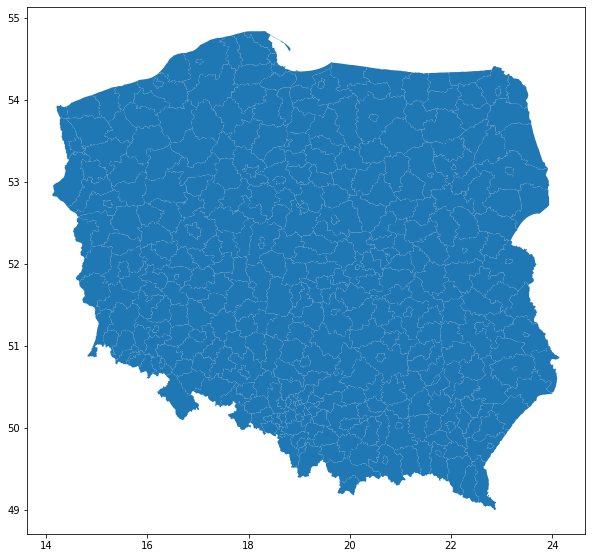

In [8]:
df_powiat.plot(figsize=(10,10))

In [10]:
df_powiat.head()

,id,nazwa,geometry
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.69430 50.17850, 21.69440 50..."
1,2,powiat łosicki,"MULTIPOLYGON (((22.72380 52.28040, 22.72380 52..."
2,3,powiat piaseczyński,"MULTIPOLYGON (((21.11010 52.11320, 21.10880 52..."
3,4,powiat radomski,"MULTIPOLYGON (((20.98910 51.48950, 20.98920 51..."
4,5,powiat sierpecki,"MULTIPOLYGON (((19.50880 52.86780, 19.50870 52..."


In [11]:
df_powiat.nazwa

0      powiat ropczycko-sędziszowski
1                     powiat łosicki
2                powiat piaseczyński
3                    powiat radomski
4                   powiat sierpecki
                   ...              
375                      powiat Żory
376               powiat nowodworski
377                  powiat jaworski
378                 powiat poznański
379                  powiat koniński
Name: nazwa, Length: 380, dtype: object

## Określenie położenia użytkowników tweetera

In [24]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [25]:
print(p1)

POINT (24.952242 60.1696017)


In [26]:
p1.within(map_df['geometry'][0])

NameError: ignored

In [12]:
data = pd.read_json('/content/location_data_all.json')

In [21]:
data = data[data.country == 'Polska']

In [22]:
data.head(1)

,id,location,SentimentPL_clear_full_text_without_hashtags,SentimentPL_clear_full_text_with_hashtags,SentimentPL_raw_full_text,y3classes_numeric,y3classes_str,coordinate,latitude,longitude,country,y3classes_sum,y3classes_str_general
0,818507868370505728,"{'address': 'Lublin, województwo lubelskie, Po...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.250559, 22.5701022]",51.250559,22.570102,Polska,1,Zwolennicy


In [34]:
list_of_powiat_id = []
list_of_powiat_str = []
list_of_wojewodztwo_id = []
list_of_wojewodztwo_str = []

for id, row in data.iterrows():
    if id%100 == 0:
        print(id)
    point_loc_user = Point(row['longitude'], row['latitude'])
    # jaki powiat
    for id_powiat, row_powiat in df_powiat.iterrows():
        if point_loc_user.within(row_powiat['geometry']):
            list_of_powiat_id.append(row_powiat['id'])
            list_of_powiat_str.append(row_powiat['nazwa'])
            break
    for id_wojewodztwo, row_wojewodztwo in df_wojewodztwo.iterrows():
        if point_loc_user.within(row_wojewodztwo['geometry']):
            list_of_wojewodztwo_id.append(row_wojewodztwo['id'])
            list_of_wojewodztwo_str.append(row_wojewodztwo['nazwa'])
            break

0
100
200
300
400
500
600
900
1000
1100
1200
1400
1500
1600
1700
1800
1900
2000
2100
2200
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3700
3800
3900
4000
4100
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5600
5700
5800
5900
6000
6100
6200
6300
6400
6700
6800
6900
7000
7100
7200
7300
7500
7600
7700
7900
8000
8100
8200
8300
8400
8500
8600
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10100
10300
10400
10500
10600
10700
10800
11000
11100
11400
11500
11600
11800
12000
12200
12300
12500
12600
12700
12800
12900
13000
13100
13300
13500
13600
13700
13800
13900
14000
14100
14400
14600
14700
14900
15000
15100
15200
15300
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17400
17500
17600
17700
17800
17900
18000
18100
18300
18600
18700
18800
18900
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
20000
20100
20200
20300
20400
20500
20700
20800
20900
21000
21100
21300
21400
21500
21600
21700
21800
21900

In [36]:
data['powiat_id'] = list_of_powiat_id
data['powiat_str'] = list_of_powiat_str 
data['wojewodztwo_id'] = list_of_wojewodztwo_id
data['wojewodztwo_str'] = list_of_wojewodztwo_str

In [38]:
data.to_json('location_data_all_v2.json')

In [ ]:
data['wojewodztwo_poligon'] = []

## Rusowanie punktów na mapie globalnie

In [42]:
# !pip install basemap
# !pip install basemap-data-hires

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import pandas as pd
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection

In [55]:
data_support

,id,location,SentimentPL_clear_full_text_without_hashtags,SentimentPL_clear_full_text_with_hashtags,SentimentPL_raw_full_text,y3classes_numeric,y3classes_str,coordinate,latitude,longitude,country,y3classes_sum,y3classes_str_general,powiat_id,powiat_str,wojewodztwo_id,wojewodztwo_str
0,818507868370505728,"{'address': 'Lublin, województwo lubelskie, Po...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.250559, 22.5701022]",51.250559,22.570102,Polska,1,Zwolennicy,70,powiat Lublin,15,lubelskie
1,826181970019352576,"{'address': 'Nałęczów, gmina Nałęczów, powiat ...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.2876064, 22.214792]",51.287606,22.214792,Polska,28,Zwolennicy,255,powiat puławski,15,lubelskie
2,892091865994022912,"{'address': 'Wrocław, województwo dolnośląskie...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.1089776, 17.0326689]",51.108978,17.032669,Polska,175,Zwolennicy,33,powiat Wrocław,8,dolnośląskie
3,160482101,"{'address': 'Wrocław, województwo dolnośląskie...",0.113673,0.113673,0.361539,1,Zwolennicy,"[51.1089776, 17.0326689]",51.108978,17.032669,Polska,11,Zwolennicy,33,powiat Wrocław,8,dolnośląskie
4,2248032699,"{'address': 'Sobków, gmina Sobków, powiat jędr...",0.113673,0.113673,0.361539,1,Zwolennicy,"[50.6981874, 20.4559353]",50.698187,20.455935,Polska,25,Zwolennicy,232,powiat jędrzejowski,5,świętokrzyskie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22743,1348757919676968968,"{'address': 'Warszawa, województwo mazowieckie...",-0.276847,-0.192309,0.412004,1,Zwolennicy,"[52.2319581, 21.0067249]",52.231958,21.006725,Polska,1,Zwolennicy,302,powiat Warszawa,14,mazowieckie
22744,1097714569,"{'address': 'Stary Sącz, gmina Stary Sącz, pow...",0.134435,0.079437,0.108639,1,Zwolennicy,"[49.5640268, 20.6366235]",49.564027,20.636623,Polska,1,Zwolennicy,104,powiat nowosądecki,10,małopolskie
22745,1379741309787901959,"{'address': 'Polska', 'latitude': 52.215933, '...",-0.008995,-0.008995,0.028258,1,Zwolennicy,"[52.215933, 19.134422]",52.215933,19.134422,Polska,1,Zwolennicy,174,powiat kutnowski,13,łódzkie
22748,49009621,"{'address': 'Gorzów Wielkopolski, województwo ...",-0.331718,-0.327585,0.324044,1,Zwolennicy,"[52.7309926, 15.2400451]",52.730993,15.240045,Polska,1,Zwolennicy,259,powiat Gorzów Wielkopolski,16,lubuskie


In [77]:
data_support = data[data.y3classes_str_general == 'Zwolennicy']
data_against = data[data.y3classes_str_general == 'Przeciwnicy']
Przeciwnicy_color = "#FF5E5B"
Zwolennicy_color = "#28965A"

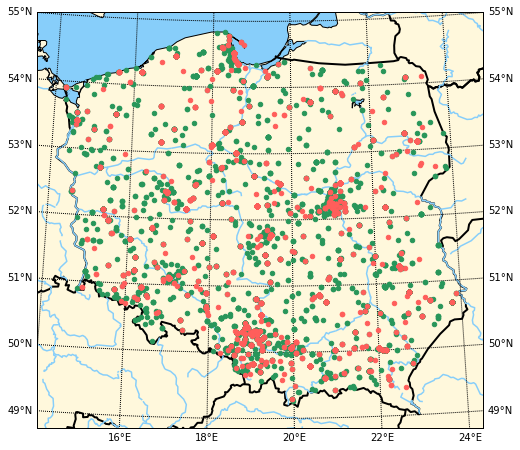

In [112]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(resolution='i',
            projection='aea',
            ellps='WGS84', 
            lat_0=52, lon_0=19.22,
            width=0.75E6, height=0.7E6)
# m.shadedrelief()


# m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
water = 'lightskyblue'
earth = 'cornsilk'
m.drawcoastlines()
m.drawrivers(color=water, linewidth=1.5)
m.fillcontinents(
    color=earth,
    lake_color=water)
m.drawmapboundary(fill_color=water)
# m.drawcountries()
m.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
m.drawparallels(
    np.arange(0, 80), 
    labels=[True, True, False, False])


x1, y1 = m(data_support.longitude, data_support.latitude)
x2, y2 = m(data_against.longitude, data_against.latitude)

m.scatter(x1, y1, 
               color=Zwolennicy_color, s=20, zorder=10, label="Juneau",)

m.scatter(x2, y2, 
               color=Przeciwnicy_color, s=20, zorder=10, label="Juneau",)

plt.savefig('mapa_general2.png', dpi=400)

In [51]:
data.y3classes_str_general.unique()

array(['Zwolennicy', 'Przeciwnicy'], dtype=object)

In [115]:
data_part = data.groupby(by=['wojewodztwo_str', 'y3classes_str_general'])['id'].count().reset_index()

In [116]:
data_part

,wojewodztwo_str,y3classes_str_general,id
0,dolnośląskie,Przeciwnicy,207
1,dolnośląskie,Zwolennicy,1068
2,kujawsko-pomorskie,Przeciwnicy,87
3,kujawsko-pomorskie,Zwolennicy,469
4,lubelskie,Przeciwnicy,83
5,lubelskie,Zwolennicy,409
6,lubuskie,Przeciwnicy,30
7,lubuskie,Zwolennicy,194
8,mazowieckie,Przeciwnicy,649
9,mazowieckie,Zwolennicy,4167
